In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading and Understanding The Data

In [165]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [166]:
data.shape

(9240, 37)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [168]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [169]:
### Checking for duplicates in Prospect ID and Lead Number Column
print("The Number of rows present in data frame is:",data.shape[0])
print("The Number of unique values of Prospect ID column is: ",len(set(data['Prospect ID'])))
print("The Number of unique values of Prospect ID column is: ",len(set(data['Lead Number'])))

The Number of rows present in data frame is: 9240
The Number of unique values of Prospect ID column is:  9240
The Number of unique values of Prospect ID column is:  9240


* Thus we can say that, there are no duplicate IDs in both Prospect and Lead Number columns and are unique and is same as the number of rows of the data frame.

## Exploratory Data Analysis

### Data Cleaning:

#### Checking for percentage of null values in all columns:

In [171]:
null_per=round(data.isnull().sum()*100/len(data),2)
null_per

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [174]:
## Removing the columns with more than or equal to 45 % Null values in them
data=data[null_per[null_per.values<45].index]

In [175]:
round(data.isnull().sum()*100/len(data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Deleting Unnecessary Columns:

* Since, Prospect ID and Lead ID are acting like an index and no duplicates are found, it is safe to delete those columns.

In [185]:
data=data.iloc[:,2:]

#### Imputation of Categorical Variables:

In [208]:
obj_cols=round(data[data.select_dtypes(include='object').columns].isnull().sum()/len(data)*100,2)
obj_cols

Do Not Email                                      0.00
Do Not Call                                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                             36.29
Update me on Supply Chain Content                 0.00
Get update

In [207]:
## Selecting the object data type columns whose missing values percentage >= 10%
data[obj_cols[obj_cols>=10].index].describe()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City
count,6779,7802,7033,6550,6531,5887,6531,7820
unique,38,19,10,6,3,26,6,7
top,India,Select,Select,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Mumbai
freq,6492,1942,5043,5600,6528,2072,4146,3222


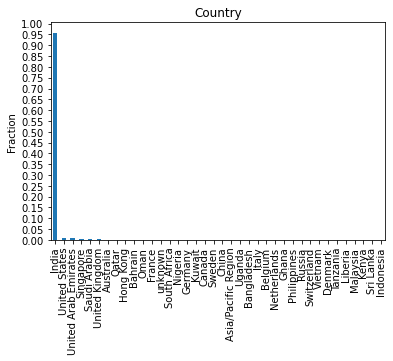

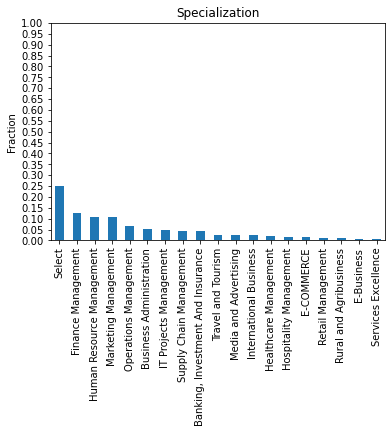

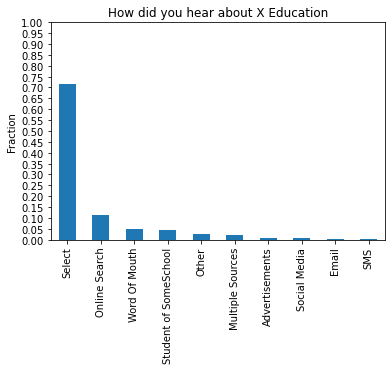

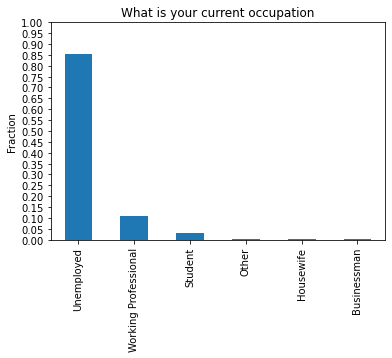

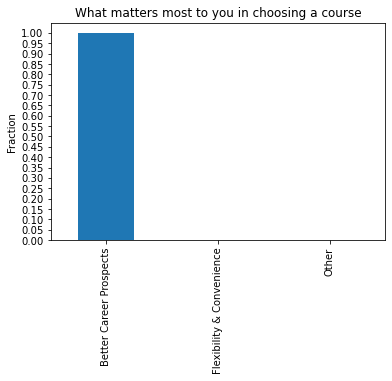

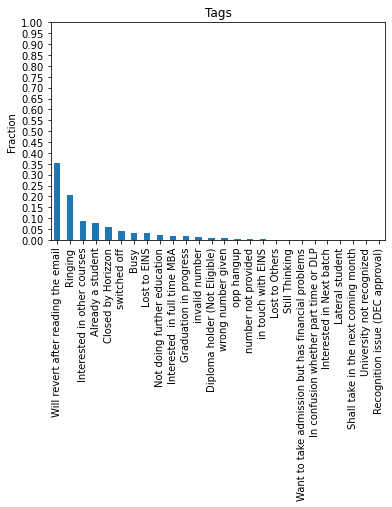

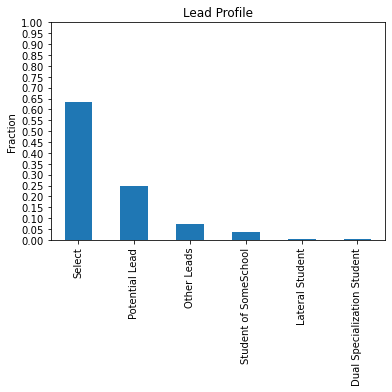

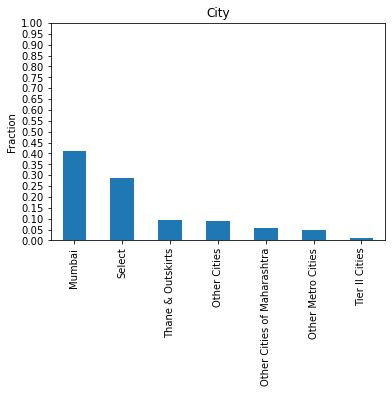

In [229]:
## Plotting object variables whose missing values > = 10%
obj_cols10=obj_cols[obj_cols>=10].index
for i in obj_cols10:
    data[i].value_counts(normalize=True).plot.bar()
    listof_xticks=np.arange(0,1.05,0.05)
    plt.yticks(listof_xticks)
    plt.title(label=i)
    plt.ylabel("Fraction")
    plt.show()

-  From the above plots, we could see that in 'Specialisation' column, around 25 % of leads have specialisation as 'Select' which means their specialisation is not specified by them. It is better to replace 'Select' in this column as 'Not Specified'. <br>
-  Similarly in the column 'How Did you Hear about X Education' it is better to replace 'Select' values with 'Not Specified'. <br>
-  In the 'Lead Profile' column it is better to replace the 'Select' category as 'Unknown Lead'.<br>
-  In the 'City' column, it is better to merge 'Select' cell values by replacing them as 'Other Cities'.

In [232]:
data['Specialization']=data['Specialization'].replace('Select','Not Specified')
data['How did you hear about X Education']=data['How did you hear about X Education'].replace('Select','Not Specified')
data['Lead Profile']=data['Lead Profile'].replace('Select','Unknown Lead')
data['City']=data['City'].replace('Select','Other Cities')

-  The above categorical columns who have missing value >=10 % but less than <=50 % could be replaced by the mode value of the corresponding columns.

In [233]:
data[obj_cols10].mode()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City
0,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,Will revert after reading the email,Unknown Lead,Mumbai


In [238]:
data['Country']=data['Country'].replace(np.nan,'India')
data['Specialization']=data['Specialization'].replace(np.nan,'Not Specified')
data['How did you hear about X Education']=data['How did you hear about X Education'].replace(np.nan,'Not Specified')
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')
data['What matters most to you in choosing a course']=data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
data['Tags']=data['Tags'].replace(np.nan,'Will revert after reading the email')
data['Lead Profile']=data['Lead Profile'].replace(np.nan,'Unknown Lead')
data['City']=data['City'].replace(np.nan,'Mumbai')

In [242]:
## Checking for percentage of null values again
print(round(data.isnull().sum()*100/len(data),2))
print("The Shape of data frame is:",data.shape)

Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

Only a few columns have <2% of missing values, thus removing the correpsonding rows wont affect our data analysis.

In [246]:
data.dropna(inplace=True)
print("The Null values percentage in the corresponding columns are as folows:","\n",round(data.isnull().sum()*100/len(data),2))
print("The shape of dataframe after cleaning the data is:",data.shape)

The Null values percentage in the corresponding columns are as folows: 
 Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement     

#### Checking for outliers in the data:

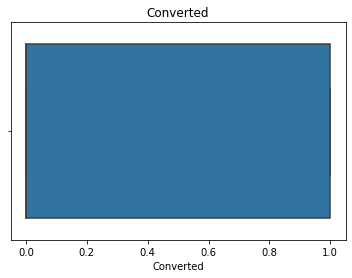

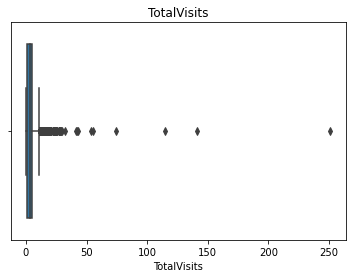

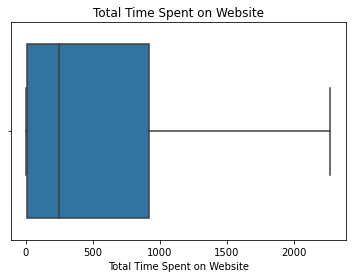

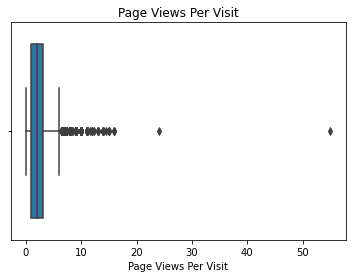

In [248]:
num_cols=data.select_dtypes(exclude='object').columns
for i in num_cols:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

From above plots we can see that 'Total Visits' and 'Page Views Per Visit' columns have outliers.

In [195]:
print(data['TotalVisits'].describe())
print("The percentage of null values in 'Total Visits' column is:" , round(data['TotalVisits'].isnull().sum()/len(data)*100,2),"%")

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
The percentage of null values in 'Total Visits' column is: 1.48 %


#### Categorical Analysis:

In [182]:
num_cols=data.select_dtypes(include='object').columns
num_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

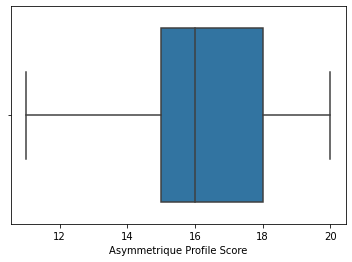

In [163]:
sns.boxplot(data['Asymmetrique Profile Score'])
data['Asymmetrique Profile Score'].describe()

In [100]:
data[data.select_dtypes(include='object').columns]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,...,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Select,Unemployed,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Select,Unemployed,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,SMS Sent,India,Human Resource Management,Online Search,NaN,...,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,No,No,SMS Sent


In [101]:
data1 = data.select_dtypes(include='object').replace("Select", "Not Specified")
round(data1.isnull().sum()/len(data1)*100,2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [102]:
data1['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [19]:
round(data.isnull().sum()/len(data)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [20]:
data.iloc[:,16:22]

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement
0,No,No,No,No,No,No
1,No,No,No,No,No,No
2,No,No,No,No,No,No
3,No,No,No,No,No,No
4,No,No,No,No,No,No
...,...,...,...,...,...,...
9235,No,No,No,No,No,No
9236,No,No,No,No,No,No
9237,No,No,No,No,No,No
9238,No,No,No,No,No,No


In [91]:
data.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [103]:
data2=data.iloc[:,16:23]
data2[data2['Search']=="Yes"]

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
2307,Yes,No,No,No,No,No,No
2511,Yes,No,No,No,No,No,No
2821,Yes,No,No,No,No,No,Yes
2897,Yes,No,No,No,No,No,No
3203,Yes,No,No,No,No,No,No
3844,Yes,No,No,No,No,No,No
5193,Yes,No,Yes,Yes,No,Yes,Yes
5568,Yes,No,No,No,No,No,No
7195,Yes,No,No,No,No,No,No
7377,Yes,No,No,No,No,No,No
